### Marianella Salinas (ms3783), Carlijn Smeets (cas572), and Emily Gelchie (emg275)



### Loan Data Basic EDA
- Printing dataset head
- Checking for any null values and verifying object type
- Checking for duplicated rows
- Statistical summary to understand data context
- Visualize numerical features in graphs 
- Visualize the distrubution of LoanApprovals 


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

file_path = 'Loan.csv'
loan_data = pd.read_csv(file_path)
loan_data.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [2]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [3]:
loan_data.duplicated().sum()

np.int64(0)

In [4]:
loan_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,20000.0,39.752600,11.622713,18.000000,32.000000,40.000000,48.000000,8.000000e+01
AnnualIncome,20000.0,59161.473550,40350.845168,15000.000000,31679.000000,48566.000000,74391.000000,4.853410e+05
CreditScore,20000.0,571.612400,50.997358,343.000000,540.000000,578.000000,609.000000,7.120000e+02
Experience,20000.0,17.522750,11.316836,0.000000,9.000000,17.000000,25.000000,6.100000e+01
LoanAmount,20000.0,24882.867800,13427.421217,3674.000000,15575.000000,21914.500000,30835.000000,1.847320e+05
LoanDuration,20000.0,54.057000,24.664857,12.000000,36.000000,48.000000,72.000000,1.200000e+02
NumberOfDependents,20000.0,1.517300,1.386325,0.000000,0.000000,1.000000,2.000000,5.000000e+00
MonthlyDebtPayments,20000.0,454.292700,240.507609,50.000000,286.000000,402.000000,564.000000,2.919000e+03
CreditCardUtilizationRate,20000.0,0.286381,0.159793,0.000974,0.160794,0.266673,0.390634,9.173801e-01
NumberOfOpenCreditLines,20000.0,3.023350,1.736161,0.000000,2.000000,3.000000,4.000000,1.300000e+01


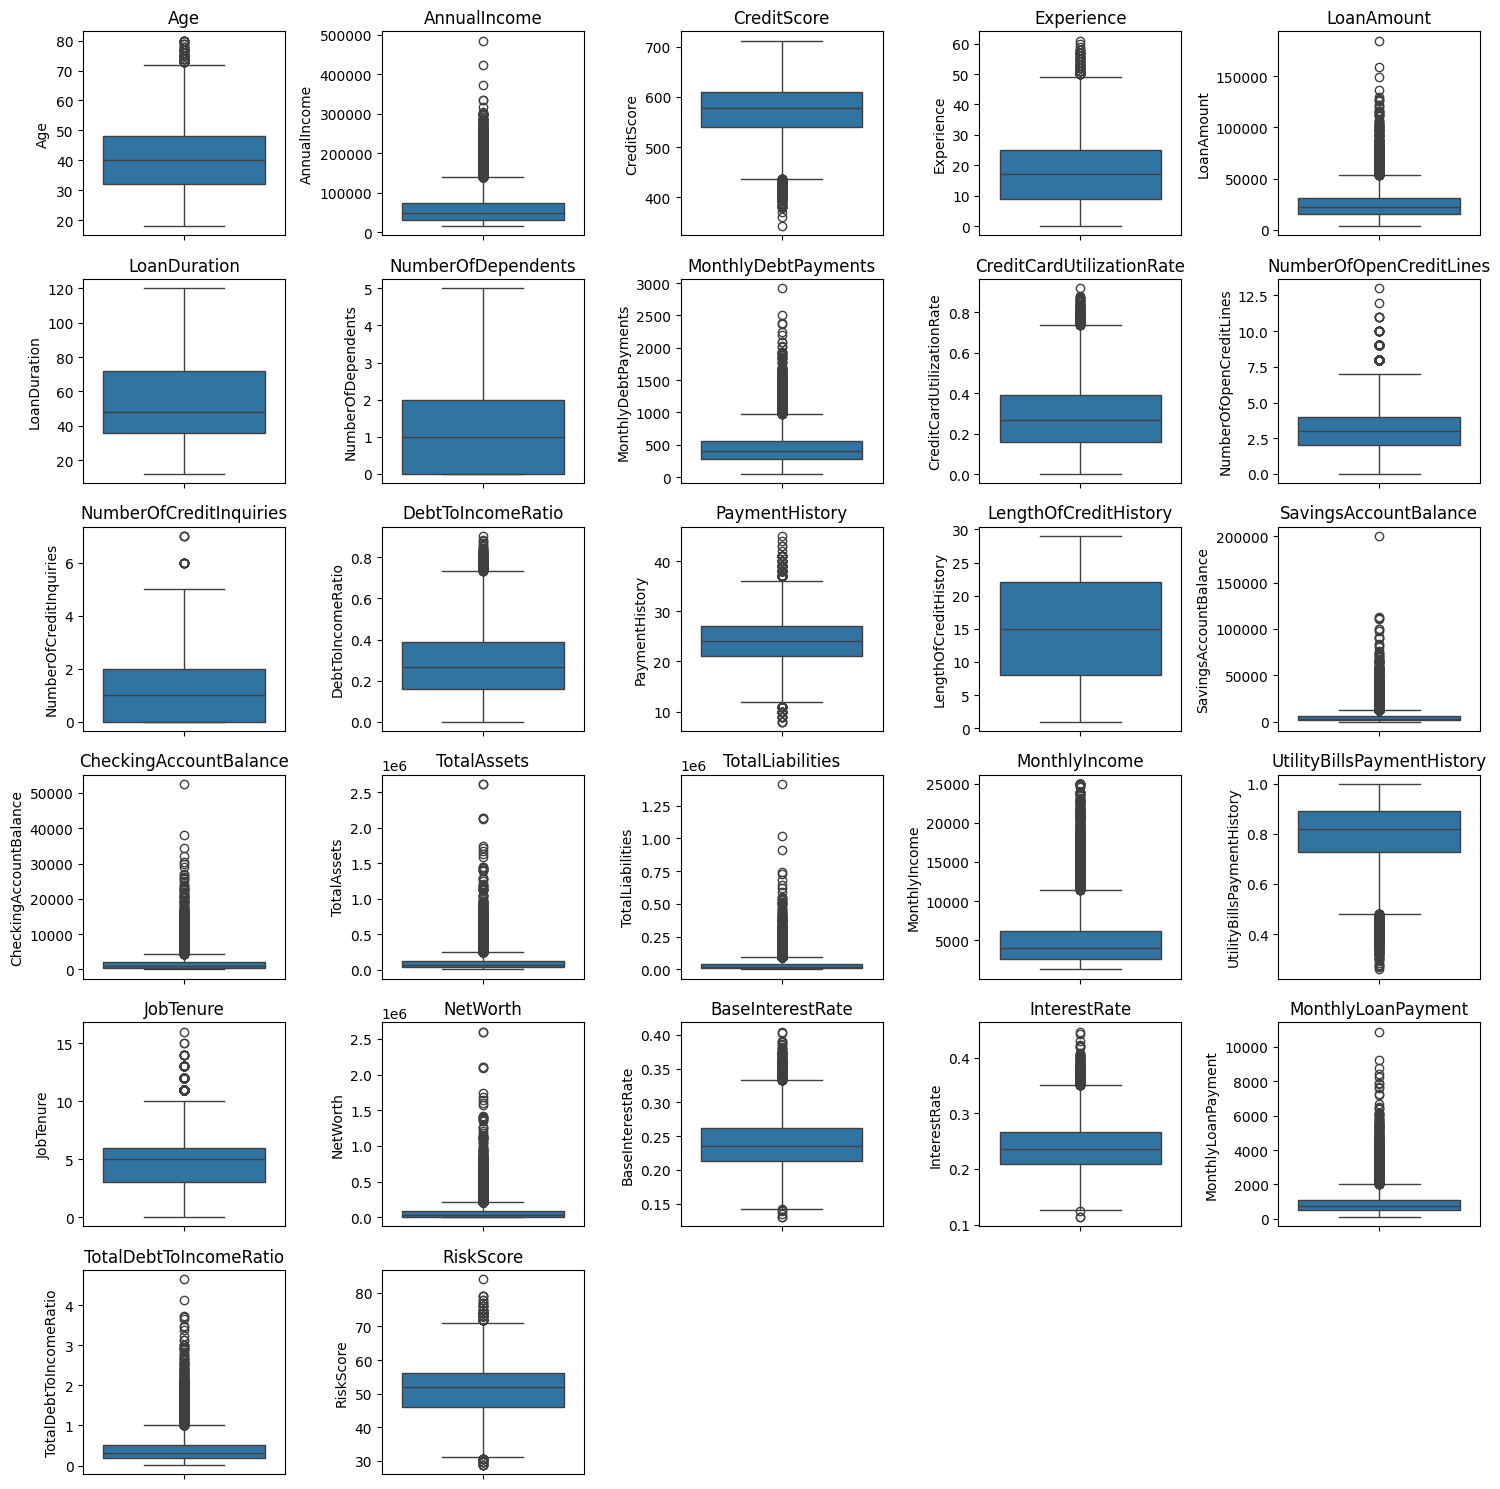

In [5]:
loan_data['BankruptcyHistory'] = loan_data['BankruptcyHistory'].astype('object')
loan_data['PreviousLoanDefaults'] = loan_data['PreviousLoanDefaults'].astype('object')
loan_data['LoanApproved'] = loan_data['LoanApproved'].astype('object')

plt.figure(figsize=(15,15))
t = 1

numerical_variables = loan_data.select_dtypes(exclude='object').columns.to_list()
categorical_variables = loan_data.select_dtypes(include='object').columns.to_list()

for i in numerical_variables:
    plt.subplot(6,5,t)
    sns.boxplot(loan_data[i])
    plt.title(i)
    t+=1
plt.tight_layout()
plt.show()


/var/folders/y6/dr3ghbgj7r5636jwwh64_f900000gn/T/ipykernel_9265/2546816192.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=loan_data, x='LoanApproved', palette='coolwarm')


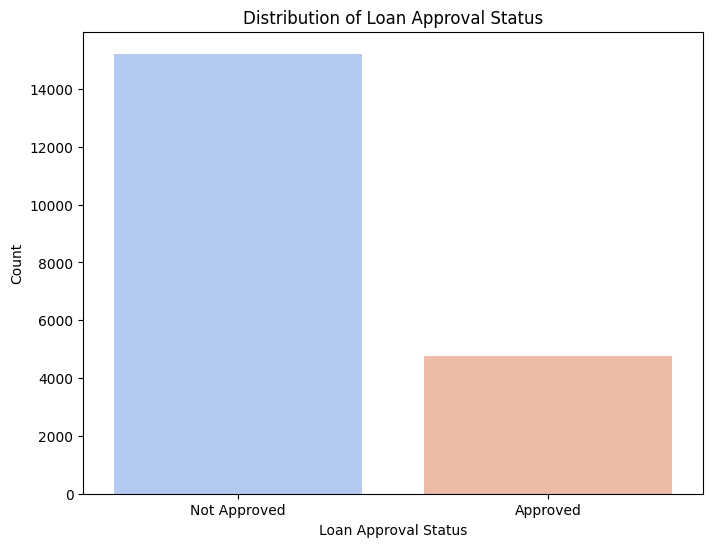

LoanApproved
0    15220
1     4780
Name: count, dtype: int64

In [6]:

plt.figure(figsize=(8, 6))
sns.countplot(data=loan_data, x='LoanApproved', palette='coolwarm')
plt.title("Distribution of Loan Approval Status")
plt.xlabel("Loan Approval Status")
plt.ylabel("Count")
plt.xticks([0, 1], ['Not Approved', 'Approved'])
plt.show()
loan_data['LoanApproved'].value_counts()

### Data Preprocessing 
- Encode categorical variables 
- Scale RiskScore

In [7]:
# Converting these columns back to numeric datatype after the visualization 
loan_data['BankruptcyHistory'] = loan_data['BankruptcyHistory'].astype('int')
loan_data['PreviousLoanDefaults'] = loan_data['PreviousLoanDefaults'].astype('int')
loan_data['LoanApproved'] = loan_data['LoanApproved'].astype('int')

# Categorical variables from least to best
loan_data['EmploymentStatus'] = loan_data['EmploymentStatus'].replace({"Unemployed": 0, "Self-Employed": 1, "Employed": 2})
loan_data['EducationLevel'] = loan_data['EducationLevel'].replace({"High School": 0, "Associate": 1, "Bachelor": 2, "Master": 3, "Doctorate": 4})

# Encode 
encode = LabelEncoder()

for i in ['MaritalStatus','HomeOwnershipStatus','LoanPurpose']:
    loan_data[i] = encode.fit_transform(loan_data[i])

# Scale risk score
scaler = StandardScaler()
for i in numerical_variables:
    if i!='RiskScore':
        loan_data[i]=scaler.fit_transform(loan_data[[i]])

/var/folders/y6/dr3ghbgj7r5636jwwh64_f900000gn/T/ipykernel_9265/1105334247.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_data['EmploymentStatus'] = loan_data['EmploymentStatus'].replace({"Unemployed": 0, "Self-Employed": 1, "Employed": 2})
/var/folders/y6/dr3ghbgj7r5636jwwh64_f900000gn/T/ipykernel_9265/1105334247.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_data['EducationLevel'] = loan_data['EducationLevel'].replace({"High School": 0, "Associate": 1, "Bachelor": 2, "Master": 3, "Doctorate": 4})


### Create Correlation Matrix to Gather Features for Model Training


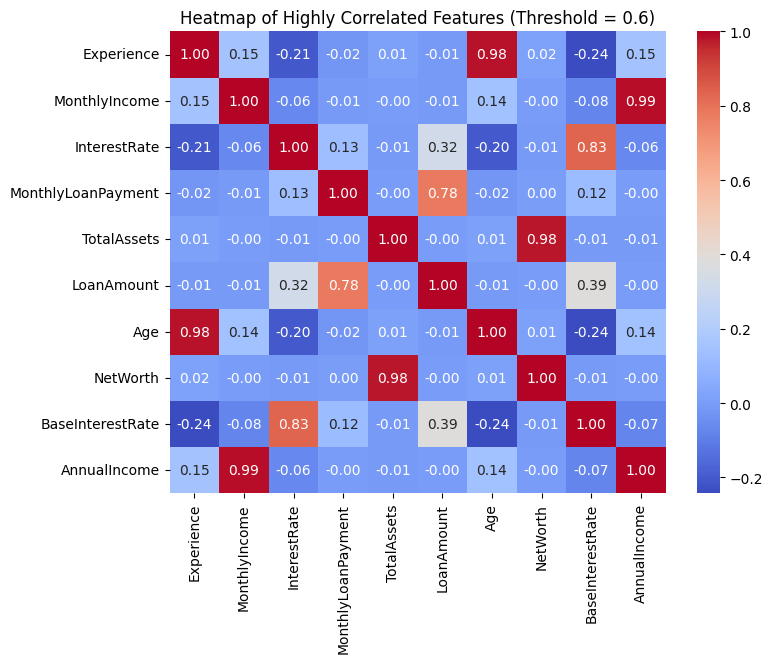

In [8]:
# Select numerical features for correlation
numerical_features = loan_data.select_dtypes(include=['float64', 'int64'])
threshold = 0.6
correlation_matrix = numerical_features.corr()

# Convert the set of high correlation features to a list
high_corr_pairs = (correlation_matrix
                   .unstack()
                   .reset_index()
                   .rename(columns={0: 'correlation', 'level_0': 'feature_1', 'level_1': 'feature_2'}))

# Filter out self-correlations and retain only high correlations
high_corr_pairs = high_corr_pairs[(high_corr_pairs['correlation'] >= threshold) & 
                                  (high_corr_pairs['feature_1'] != high_corr_pairs['feature_2'])]

# Get the unique set of highly correlated features not including LoanApproved
high_corr_features = set(high_corr_pairs['feature_1']).union(set(high_corr_pairs['feature_2']))
high_corr_features_list = list(high_corr_features)
high_corr_features_list = [feature for feature in high_corr_features_list if feature != 'LoanApproved']

# Filter the correlation matrix to include only these features
filtered_correlation_matrix = correlation_matrix.loc[high_corr_features_list, high_corr_features_list]

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(filtered_correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap of Highly Correlated Features (Threshold = 0.6)")
plt.show()


### Feature Correlation with Loan Approval Graph

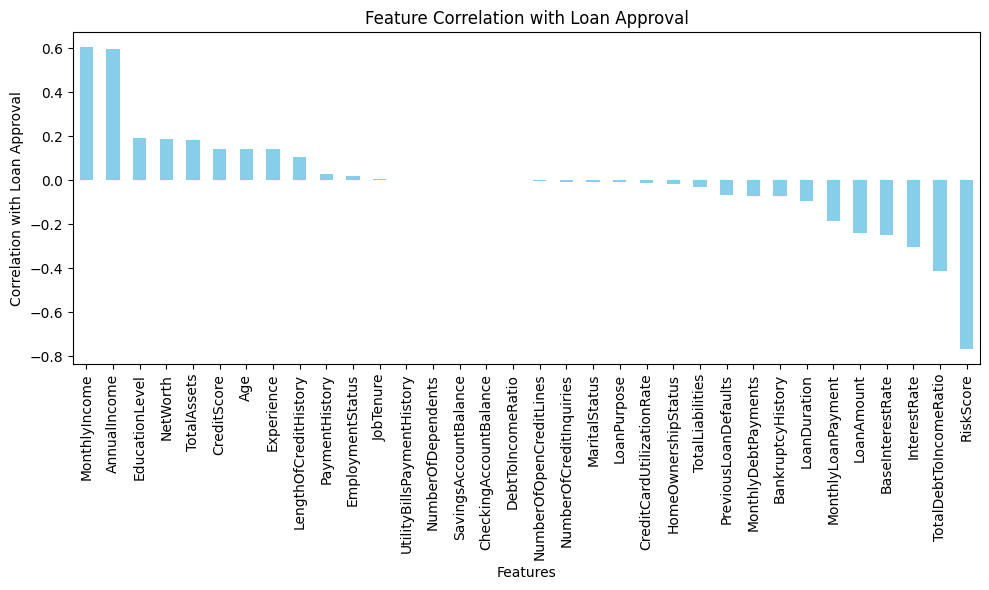

In [9]:
# Calculate the correlation of each feature with the LoanApproved target variable
loan_approval_correlation = correlation_matrix['LoanApproved'].drop('LoanApproved').sort_values(ascending=False)

# Plot the correlations with LoanApproved
plt.figure(figsize=(10, 6))
loan_approval_correlation.plot(kind='bar', color='skyblue')
plt.title("Feature Correlation with Loan Approval")
plt.xlabel("Features")
plt.ylabel("Correlation with Loan Approval")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### Experiement with Predictor Variables
- Make new variables by combining some features into an entirely new parameter


In [10]:
# Augment the dataset 
loan_data['IncomeToDebt'] = loan_data['AnnualIncome'] / loan_data['TotalDebtToIncomeRatio']
loan_data['LoanToNetWorth'] = loan_data['LoanAmount'] / loan_data['NetWorth']
loan_data['DebtRiskScore'] = loan_data['TotalDebtToIncomeRatio'] * loan_data['RiskScore']
loan_data['ExperienceAgeRatio'] = loan_data['Experience'] / loan_data['Age']

# Display new variables
loan_data[['IncomeToDebt', 'LoanToNetWorth', 'DebtRiskScore', 'ExperienceAgeRatio']].head()

,IncomeToDebt,LoanToNetWorth,DebtRiskScore,ExperienceAgeRatio
0,0.729892,-1.885665,-31.966989,0.876294
1,13.252253,-0.355788,-1.891676,1.478338
2,-2.582135,0.949797,9.202037,1.201310
3,-0.935569,4.208728,-14.193792,0.927398
4,-1.115867,-0.891053,-35.262399,0.195044


### Split Data and Pick Predictor Variables

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from collections import Counter

target_variable = 'LoanApproved'
predictor_variables = ['MonthlyIncome', 'AnnualIncome', 'NetWorth', 'TotalAssets', 'CreditScore', 'Age', 'Experience', 'LengthOfCreditHistory', 'PaymentHistory', 'TotalDebtToIncomeRatio', 'RiskScore', 'InterestRate', 'BaseInterestRate', 'LoanAmount', 'LoanDuration'] #BEST PREF. 
#predictor_variables = high_corr_features_list
#predictor_variables = ['CreditScore', 'RiskScore', 'Age', 'LengthOfCreditHistory', 'IncomeToDebt', 'LoanToNetWorth', 'DebtRiskScore', 'ExperienceAgeRatio']
#predictor_variables = ['RiskScore']
print(high_corr_features_list)


# Split the data
X = loan_data[predictor_variables]
y = loan_data[target_variable]

for col in X.select_dtypes(include=['object']).columns:
    X[col] = encode.fit_transform(X[col])
    
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

['Experience', 'MonthlyIncome', 'InterestRate', 'MonthlyLoanPayment', 'TotalAssets', 'LoanAmount', 'Age', 'NetWorth', 'BaseInterestRate', 'AnnualIncome']


### Oversampling Techniques 
- SMOTE 
- ADASYN
- Uniform Sampling 
- GMM 
- KMeans

In [15]:
from imblearn.over_sampling import SMOTE

#SMOTE 
smote = SMOTE(random_state=42)
print("Before SMOTE:", Counter(y_train))
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("After SMOTE:", Counter(y_train_smote))


Before SMOTE: Counter({0: 12176, 1: 3824})
After SMOTE: Counter({0: 12176, 1: 12176})


/Users/marianellasalinas/Cornell/Applied Machine Learning/Loan-Approval-Risk-Project/.venv/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/marianellasalinas/Cornell/Applied Machine Learning/Loan-Approval-Risk-Project/.venv/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [13]:
from imblearn.over_sampling import ADASYN

#ADASYN
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)
print("After ADASYN:", Counter(y_train_adasyn))


After ADASYN: Counter({1: 12181, 0: 12176})


/Users/marianellasalinas/Cornell/Applied Machine Learning/Loan-Approval-Risk-Project/.venv/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/marianellasalinas/Cornell/Applied Machine Learning/Loan-Approval-Risk-Project/.venv/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The ADASYN or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [14]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from collections import Counter
from sklearn.utils import resample

# Uniform Sampling

# Separate the minority and majority class data
minority_class = 1  # 1 is the minority class
X_minority = X_train[y_train == minority_class]
y_minority = y_train[y_train == minority_class]

majority_count = Counter(y_train)[0]
minority_count = Counter(y_train)[1]

# Calculate the number of samples needed to balance the classes
samples_to_generate = majority_count - minority_count

# Check if there are enough samples to generate
if samples_to_generate > 0:
	# Uniformly sample from the minority class with replacement
	synthetic_samples = X_minority.iloc[np.random.choice(X_minority.shape[0], samples_to_generate, replace=True)]
	synthetic_labels = np.array([minority_class] * samples_to_generate)

	# Combine synthetic samples with the original training data
	X_train_uniform = np.vstack((X_train, synthetic_samples))
	y_train_uniform = np.hstack((y_train, synthetic_labels))

	print("After Uniform Augmentation:", Counter(y_train_uniform))
else:
	X_train_uniform = X_train
	y_train_uniform = y_train
	print("No augmentation needed as classes are already balanced.")
 

After Uniform Augmentation: Counter({np.int64(0): 12176, np.int64(1): 12176})


In [20]:
# Stratified Sampling 

# Separate the majority and minority class
minority_class = 1
X_minority = X_train[y_train == minority_class]
y_minority = y_train[y_train == minority_class]

X_majority = X_train[y_train == 0]
y_majority = y_train[y_train == 0]

# Perform stratified resampling to balance the classes
X_minority_resampled, y_minority_resampled = resample(
    X_minority, y_minority,
    replace=True,                   # Allow replacement for resampling
    n_samples=len(y_majority),      # Match the majority class size
    random_state=42                 # Ensure reproducibility
)

# Combine resampled minority class with the original majority class
X_train_strat = np.vstack((X_majority, X_minority_resampled))
y_train_strat = np.hstack((y_majority, y_minority_resampled))

# Check class distribution after stratified resampling
print("After Stratified Augmentation:", Counter(y_train_strat))

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_strat, y_train_strat)

# Predict on the test set
y_pred = model.predict(X_test)

After Stratified Augmentation: Counter({np.int64(0): 12176, np.int64(1): 12176})


/Users/marianellasalinas/Cornell/Applied Machine Learning/Loan-Approval-Risk-Project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [21]:

# GMM 

from sklearn.mixture import GaussianMixture
import numpy as np
from collections import Counter

# Separate the minority class data
minority_class = 1 
X_minority = X_train[y_train == minority_class]

# Fit a Gaussian Mixture Model to the minority class
gmm = GaussianMixture(n_components=2, random_state=42)  # Adjust components as needed
gmm.fit(X_minority)

# Calculate the number of synthetic samples needed for balance
majority_count = Counter(y_train)[0]
minority_count = Counter(y_train)[1]
samples_to_generate = majority_count - minority_count

# Generate synthetic samples
synthetic_samples, _ = gmm.sample(n_samples=samples_to_generate)

# Add synthetic samples to the training set
X_train_gmm = np.vstack((X_train, synthetic_samples))
y_train_gmm = np.hstack((y_train, [minority_class] * samples_to_generate))

print("Before GMM Augmentation:", Counter(y_train))
print("After GMM Augmentation:", Counter(y_train_gmm))

Before GMM Augmentation: Counter({0: 12176, 1: 3824})
After GMM Augmentation: Counter({np.int64(0): 12176, np.int64(1): 12176})


In [22]:

from sklearn.cluster import KMeans
import numpy as np
from collections import Counter

#Kmean 

# Separate the minority class data
minority_class = 1  # Assuming 1 is the minority class
X_minority = X_train[y_train == minority_class]

# Fit a KMeans model to the minority class
kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust n_clusters as needed
kmeans.fit(X_minority)

# Calculate the number of synthetic samples needed for balance
majority_count = Counter(y_train)[0]
minority_count = Counter(y_train)[1]
samples_to_generate = majority_count - minority_count

# Generate synthetic samples by sampling around cluster centroids
synthetic_samples = []
centroids = kmeans.cluster_centers_

for _ in range(samples_to_generate):
    # Randomly pick a cluster centroid
    random_centroid = centroids[np.random.choice(len(centroids))]
    # Add random noise to the centroid to generate synthetic data
    synthetic_sample = random_centroid + np.random.normal(0, 0.01, size=random_centroid.shape)
    synthetic_samples.append(synthetic_sample)

synthetic_samples = np.array(synthetic_samples)

# Add synthetic samples to the training set
X_train_augmented = np.vstack((X_train, synthetic_samples))
y_train_augmented = np.hstack((y_train, [minority_class] * samples_to_generate))

# Check class distribution before and after augmentation
print("Before KMM Augmentation:", Counter(y_train))
print("After KMM Augmentation:", Counter(y_train_augmented))

Before KMM Augmentation: Counter({0: 12176, 1: 3824})
After KMM Augmentation: Counter({np.int64(0): 12176, np.int64(1): 12176})


### Run Different Models and Evaluate Preformance 
1. Random Forrest 
2. Logistic Regression
3. Support Vector Machine 
4. Gradient Boosting XGboost
5. Gradient Boosting 
6. AdaBoost 
7. Gaussian Naive Bayes

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
report = classification_report(y_test, y_pred, target_names=['Not Approved', 'Approved'])
print(report)


              precision    recall  f1-score   support

Not Approved       0.99      1.00      0.99      3044
    Approved       0.98      0.97      0.98       956

    accuracy                           0.99      4000
   macro avg       0.99      0.98      0.99      4000
weighted avg       0.99      0.99      0.99      4000



In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


# Train a Logistic Regression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
report = classification_report(y_test, y_pred, target_names=['Not Approved', 'Approved'])
print(report)

              precision    recall  f1-score   support

Not Approved       0.99      0.99      0.99      3044
    Approved       0.98      0.97      0.97       956

    accuracy                           0.99      4000
   macro avg       0.98      0.98      0.98      4000
weighted avg       0.99      0.99      0.99      4000



/Users/marianellasalinas/Cornell/Applied Machine Learning/Loan-Approval-Risk-Project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
from sklearn.svm import SVC

# Train a Support Vector Machine
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model's performance
svm_report = classification_report(y_test, y_pred_svm, target_names=['Not Approved', 'Approved'])
print(svm_report)

              precision    recall  f1-score   support

Not Approved       0.98      0.99      0.99      3044
    Approved       0.98      0.95      0.96       956

    accuracy                           0.98      4000
   macro avg       0.98      0.97      0.98      4000
weighted avg       0.98      0.98      0.98      4000



In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

mlp_params = {
    "hidden_layer_sizes": [(50,), (100,), (50, 50)],
    "activation": ["tanh"],
    "alpha": [0.001],
}
mlp_model = MLPClassifier(random_state=42, max_iter=1000, alpha=0.01, hidden_layer_sizes=(50,))
mlp_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_mlp = mlp_model.predict(X_test)

# Evaluate the model's performance
mlp_report = classification_report(y_test, y_pred_mlp, target_names=['Not Approved', 'Approved'])
print(mlp_report)

              precision    recall  f1-score   support

Not Approved       1.00      0.99      0.99      3044
    Approved       0.98      0.98      0.98       956

    accuracy                           0.99      4000
   macro avg       0.99      0.99      0.99      4000
weighted avg       0.99      0.99      0.99      4000



In [27]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Train a Gradient Boosting Classifier using XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model's performance
xgb_report = classification_report(y_test, y_pred_xgb, target_names=['Not Approved', 'Approved'])
print(xgb_report)

              precision    recall  f1-score   support

Not Approved       1.00      1.00      1.00      3044
    Approved       0.99      0.99      0.99       956

    accuracy                           0.99      4000
   macro avg       0.99      0.99      0.99      4000
weighted avg       0.99      0.99      0.99      4000



In [28]:
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier

### Gradient Boosting
gb_model = GradientBoostingClassifier(
    learning_rate=0.1, max_depth=5, n_estimators=200, random_state=42
)
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)
print("\nGradient Boosting Classification Report:")
print(
    classification_report(y_test, gb_y_pred, target_names=["Not Approved", "Approved"])
)



Gradient Boosting Classification Report:
              precision    recall  f1-score   support

Not Approved       1.00      1.00      1.00      3044
    Approved       0.99      0.99      0.99       956

    accuracy                           0.99      4000
   macro avg       0.99      0.99      0.99      4000
weighted avg       0.99      0.99      0.99      4000



In [29]:
from sklearn.ensemble import AdaBoostClassifier

### AdaBoost
ada_model = AdaBoostClassifier(learning_rate=1.0, n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)
ada_y_pred = ada_model.predict(X_test)
print("\nAdaBoost Classification Report:")
print(
    classification_report(y_test, ada_y_pred, target_names=["Not Approved", "Approved"])
)



AdaBoost Classification Report:
              precision    recall  f1-score   support

Not Approved       0.99      1.00      0.99      3044
    Approved       0.99      0.98      0.98       956

    accuracy                           0.99      4000
   macro avg       0.99      0.99      0.99      4000
weighted avg       0.99      0.99      0.99      4000



In [30]:
from sklearn.naive_bayes import GaussianNB

### Gaussian Naive Bayes
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
gnb_y_pred = gnb_model.predict(X_test)
print("\nGaussian Naive Bayes Classification Report:")
print(
    classification_report(y_test, gnb_y_pred, target_names=["Not Approved", "Approved"])
)



Gaussian Naive Bayes Classification Report:
              precision    recall  f1-score   support

Not Approved       0.98      0.97      0.98      3044
    Approved       0.92      0.93      0.93       956

    accuracy                           0.96      4000
   macro avg       0.95      0.95      0.95      4000
weighted avg       0.96      0.96      0.96      4000



### Test the Different Models with Imbalence Strategies 

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Define the datasets
datasets = {
    "Original": (X_train, y_train),
    "SMOTE": (X_train_smote, y_train_smote),
    "ADASYN": (X_train_adasyn, y_train_adasyn),
    "Uniform Sampling": (X_train_uniform, y_train_uniform),
    "GMM": (X_train_gmm, y_train_gmm),
    "KMeans": (X_train_augmented, y_train_augmented),
    "STRAT": (X_train_strat, y_train_strat)
}

# Iterate over each dataset and run logistic regression
for name, (X_train, y_train) in datasets.items():
    # Train a Logistic Regression model
    model = GaussianNB()
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model's performance
    report = classification_report(y_test, y_pred, target_names=['Not Approved', 'Approved'], digits=4)
    print(f"{name} Gradient Boosting Classification Report:\n{report}")

Original Gradient Boosting Classification Report:
              precision    recall  f1-score   support

Not Approved     0.9789    0.9744    0.9766      3044
    Approved     0.9196    0.9331    0.9263       956

    accuracy                         0.9645      4000
   macro avg     0.9492    0.9537    0.9514      4000
weighted avg     0.9647    0.9645    0.9646      4000

SMOTE Gradient Boosting Classification Report:
              precision    recall  f1-score   support

Not Approved     0.9896    0.9671    0.9782      3044
    Approved     0.9024    0.9676    0.9339       956

    accuracy                         0.9673      4000
   macro avg     0.9460    0.9674    0.9561      4000
weighted avg     0.9688    0.9673    0.9676      4000

ADASYN Gradient Boosting Classification Report:
              precision    recall  f1-score   support

Not Approved     0.9928    0.9021    0.9453      3044
    Approved     0.7585    0.9791    0.8548       956

    accuracy                         

/Users/marianellasalinas/Cornell/Applied Machine Learning/Loan-Approval-Risk-Project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/Users/marianellasalinas/Cornell/Applied Machine Learning/Loan-Approval-Risk-Project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/Users/marianellasalinas/Cornell/Applied Machine Learning/Loan-Approval-Risk-Project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/Users/marianellasalinas/Cornell/Applied Machine Learning/Loan-Approval-Risk-Project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  war

### Generate AUC Curve with the Best Preformence 
- Utilizes the model with the best performance
- Visualizes the model's effectiveness in distinguishing between classes

/Users/marianellasalinas/Cornell/Applied Machine Learning/Loan-Approval-Risk-Project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/marianellasalinas/Cornell/Applied Machine Learning/Loan-Approval-Risk-Project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/marianellasalinas/Cornell/Applied Machine Learning/Loan-Approval-Risk-Project/.venv/lib/python3.12/site-packages/sklearn/utils/validation

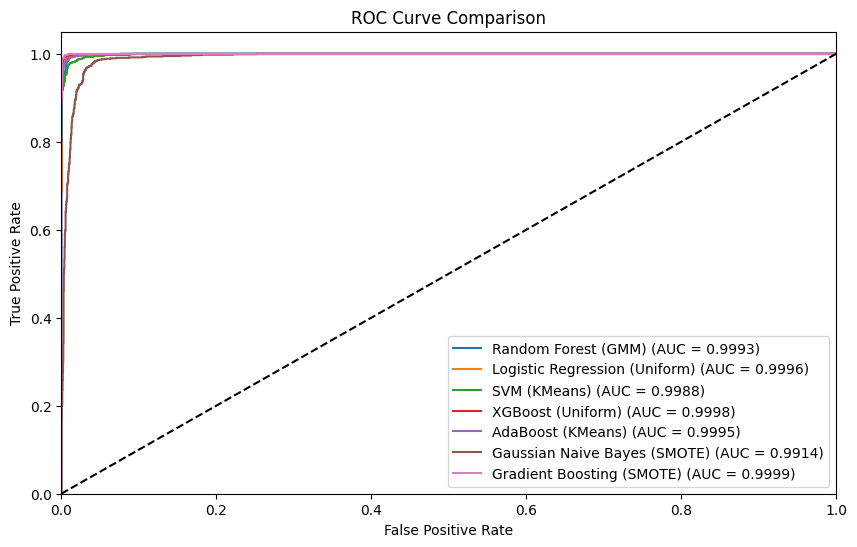

In [30]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt

# Define the models
models = {
    "Random Forest (GMM)": RandomForestClassifier(random_state=42),
    "Logistic Regression (Uniform)": LogisticRegression(random_state=42),
    "SVM (KMeans)": SVC(probability=True, random_state=42),
    "XGBoost (Uniform)": XGBClassifier(random_state=42),
    "AdaBoost (KMeans)": AdaBoostClassifier(n_estimators=100, random_state=42),
    "Gaussian Naive Bayes (SMOTE)": GaussianNB(),
    "Gradient Boosting (SMOTE)": GradientBoostingClassifier(max_depth=5, n_estimators=200, random_state=42)
}

# Define the datasets
datasets = {
    "Random Forest (GMM)": (X_train_gmm, y_train_gmm),
    "Logistic Regression (Uniform)": (X_train_uniform, y_train_uniform),
    "SVM (KMeans)": (X_train_augmented, y_train_augmented),
    "XGBoost (Uniform)": (X_train_uniform, y_train_uniform),
    "AdaBoost (KMeans)": (X_train_augmented, y_train_augmented),
    "Gaussian Naive Bayes (SMOTE)": (X_train_smote, y_train_smote),
    "Gradient Boosting (SMOTE)": (X_train_smote, y_train_smote)
}

# Plot ROC curves
plt.figure(figsize=(10, 6))

for name, model in models.items():
    X_train, y_train = datasets[name]
    model.fit(X_train, y_train)
    
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = model.decision_function(X_test)
    
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.4f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
) 



### General MLPs (with class weights)
- Computes class weights using compute_class_weight to handle class imbalance in the dataset. Then converts the training and testing data (X_train, X_test, y_train, y_test) into PyTorch tensors.
- Defines a simple MLP model using nn.Sequential with one hidden layer and ReLU activation. The model, loss function (nn.CrossEntropyLoss with class weights), and optimizer (optim.Adam) are initialized.
- Trains the MLP model for 5000 epochs, printing the loss every 1000 epochs. After training, it evaluates the model on the test set and prints the test accuracy.



In [17]:
import torch
import torch.nn as nn
import numpy as np
import torch.optim as optim
from sklearn.utils.class_weight import compute_class_weight

# Compute the class weights to handle the imbalance inside MLP
class_weights = compute_class_weight('balanced', classes=np.array([0, 1]), y=y_train.to_numpy())
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float)

# Convert X and y to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Define the MLP model

model = nn.Sequential(
    nn.Linear(X_train.shape[1], 16), # Input, Hidden layer
    nn.ReLU(),                       #Activation
    nn.Linear(16, 2),                #Output
)

# Initialize model, loss, and optimizer (here, we apply the weights)
criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)
optimizer = optim.Adam(model.parameters(), lr=0.1) # Learning rate, we changed for output generation

# Training loop - 5000 epochs
for epoch in range(5000):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)  # Forward pass
    loss = criterion(outputs, y_train_tensor)  # Compute loss
    loss.backward()  # Backpropagation
    optimizer.step()  # Update weights

    if (epoch + 1) % 1000 == 0:
        print(f"Epoch [{epoch+1}/50], Loss: {loss.item():.4f}") # Print intermediate results every 1000 epochs

# Evaluation
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)  # Get predicted class
    acc = (predicted == y_test_tensor).sum().item() / y_test_tensor.size(0)  # Compute accuracy
    print(f"Test Accuracy: {acc:.4f}")

Epoch [1000/50], Loss: 0.0242
Epoch [2000/50], Loss: 0.0240
Epoch [3000/50], Loss: 0.0245
Epoch [4000/50], Loss: 0.0240
Epoch [5000/50], Loss: 0.0240
Test Accuracy: 0.9912


### Fuzzy MLP
- Compute class weights to handle class imbalance in the dataset.
- Define functions for feature fuzzification and apply them to the training and testing data.

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import skfuzzy as fuzz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights to handle the imbalance
class_weights = compute_class_weight('balanced', classes=np.array([0, 1]), y=y_train.to_numpy())
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float)

# Feature fuzzification
def fuzzify_feature(feature, low_range, medium_range, high_range):
    low = fuzz.trimf(feature, low_range)
    medium = fuzz.trimf(feature, medium_range)
    high = fuzz.trimf(feature, high_range)
    return np.column_stack([low, medium, high])

def fuzzify_data(X):
    fuzzified_features = []
    for column in X.columns:
        fuzzified_column = fuzzify_feature(
            X[column].values,
            [X[column].min(), X[column].min(), X[column].mean()],  # Low range
            [X[column].min(), X[column].mean(), X[column].max()],  # Medium range
            [X[column].mean(), X[column].max(), X[column].max()]   # High range
        )
        fuzzified_features.append(fuzzified_column)
    return np.hstack(fuzzified_features)

# Fuzzify data (train & test)
X_train_fuzzified = torch.tensor(fuzzify_data(X_train), dtype=torch.float32)
X_test_fuzzified = torch.tensor(fuzzify_data(X_test), dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.to_numpy(), dtype=torch.long)
y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.long)

model = nn.Sequential(
    nn.Linear(X_train_fuzzified.shape[1], 16),  # Input, Hidden layer
    nn.BatchNorm1d(16),                        # Batch Normalization for Hidden Layer 1
    nn.ReLU(),                                 # Activation
    nn.Dropout(0.3),                           # Dropout for regularization
    nn.Linear(16, 8),                          # Second Hidden Layer
    nn.BatchNorm1d(8),                         # Batch Normalization for Hidden Layer 2
    nn.ReLU(),                                 # Activation
    nn.Dropout(0.3),                           # Dropout for regularization
    nn.Linear(8, 2)                            # Output layer for binary classification
)

# Loss function and optimizer - applying the class weights here
criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)
optimizer = optim.Adam(model.parameters(), lr=0.01) # also tried 0.001 and 0.1 for the best one

# Train the fuzzy MLP - 5000 epochs
epochs = 5000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_fuzzified)  # Forward pass
    loss = criterion(outputs, y_train_tensor)  # Loss computation
    loss.backward()  # Backpropagation
    optimizer.step()  # Update weights

    if (epoch + 1) % 1000 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}") # Print progress every 1000 epochs

# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred = model(X_test_fuzzified)
    _, predicted = torch.max(y_pred, 1)
    accuracy = accuracy_score(y_test_tensor, predicted)
    print(f"Test Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test_tensor, predicted))

Epoch [1000/5000], Loss: 0.0191
Epoch [2000/5000], Loss: 0.0119
Epoch [3000/5000], Loss: 0.0111
Epoch [4000/5000], Loss: 0.0136
Epoch [5000/5000], Loss: 0.0126
Test Accuracy: 0.9922
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3044
           1       0.99      0.98      0.98       956

    accuracy                           0.99      4000
   macro avg       0.99      0.99      0.99      4000
weighted avg       0.99      0.99      0.99      4000

